# Visualizing -  FordGoBike Data
## by chinni Venkata Raju Koviri

## Investigation Overview

- After investigation of Ford GoBike System bike-sharing system covering the greater San Francisco Bay area, I wanted to explain at customer behavious, how user attributes and station locations impacting the business. Also i wanted to provide the information on which the company should focus on to increase their business.


## Dataset Overview

Data consists of mulitple attributes which gives us the information about 
- type of user 
- When and where the rider started the trip
- When and where the rider end his/her trip
- birth year of the user or customer
- Trip duration

From the above data I derived some other attributes which gives us more understanding and insights.
### Data set source:
> source : https://www.lyft.com/bikes/bay-wheels/system-data

In [40]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import geopandas
import seaborn as sns
import zipfile as zfile
import requests
import missingno as ms
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [41]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("cleaneddata.csv")
df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,member_gender,bike_share_for_all_trip,start_day,start_month,end_day,end_month,duration_min,member_age,dist,Trip_Start_hour
0,0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,...,Male,No,Wednesday,January,Thursday,February,1254,34,2.492254,22
1,1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,...,No data,No,Wednesday,January,Thursday,February,1423,39,0.000000,16
2,2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,...,Male,No,Wednesday,January,Thursday,February,1192,24,2.974502,14
3,3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,...,No data,No,Wednesday,January,Thursday,February,1017,39,2.049710,14
4,4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,...,Male,No,Wednesday,January,Thursday,February,666,29,2.440571,19


## Comparison between Duration of Trips

- created bins for the duration data 
- count plot to show variations in number of trips based on duration.

Observations:
- Most of the rides are below 10minutes. Thats means the users are travelling for shorter duration.

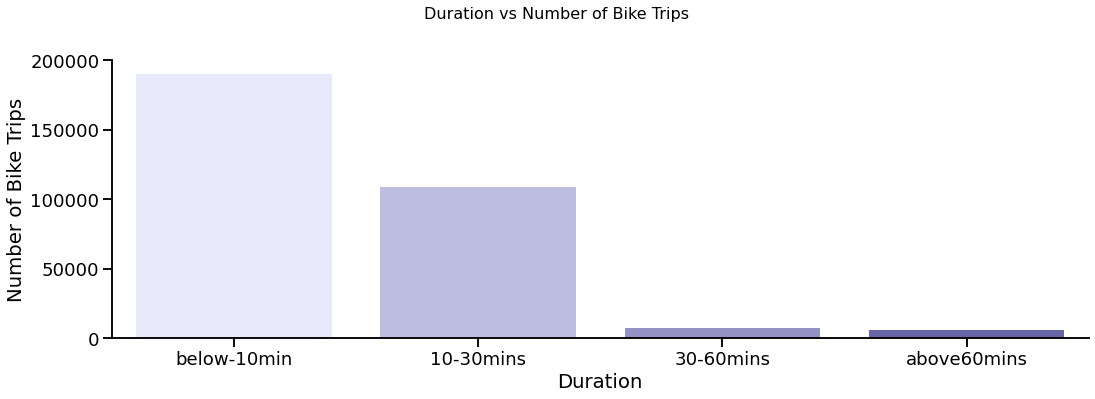

In [42]:
# count plot to show variations in number of trips based on duration.
bin_labels= ['below-10min', '10-30mins', '30-60mins', 'above60mins']
bins = [0,10,30,60,1439]
df["duration"] = pd.cut(df['duration_min'], bins,labels=bin_labels)
chart = sns.catplot(data = df, x = 'duration', kind = 'count', palette = sns.light_palette("navy"), height = 5,aspect =3);
chart.set_axis_labels('Duration', 'Number of Bike Trips');
chart.fig.suptitle("Duration vs Number of Bike Trips ",fontsize=16,y=1.1);

## Trip counts per day

- count plot to show number of trips for day.

Observations:
- Most of the rides are on weekdays. Thats means the users are more on weekdays compared to weekends.

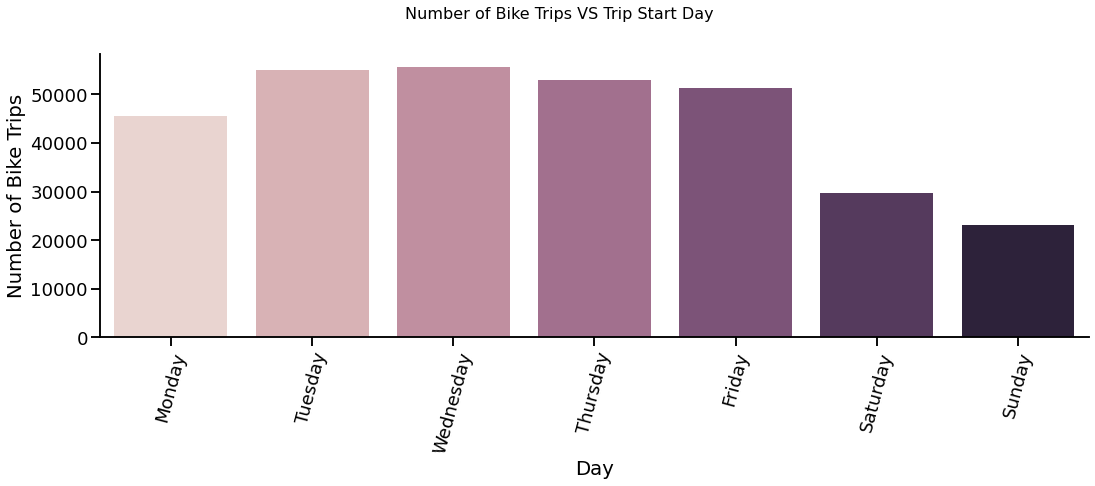

In [43]:
# catplot using seaborn libraray for Trip counts by day
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
chart = sns.catplot(data=df, x='start_day', kind='count', order= days, palette = sns.cubehelix_palette(7), height = 5,aspect =3);
chart.set_xticklabels(rotation=75);
chart.set_axis_labels('Day', 'Number of Bike Trips');
chart.fig.suptitle("Number of Bike Trips VS Trip Start Day",fontsize=16,y=1.1);

## Age Group vs Number of trips

- count plot to show number of trips per each age group.

Observations:
- Most of the riders belongs to  30-40 age group.

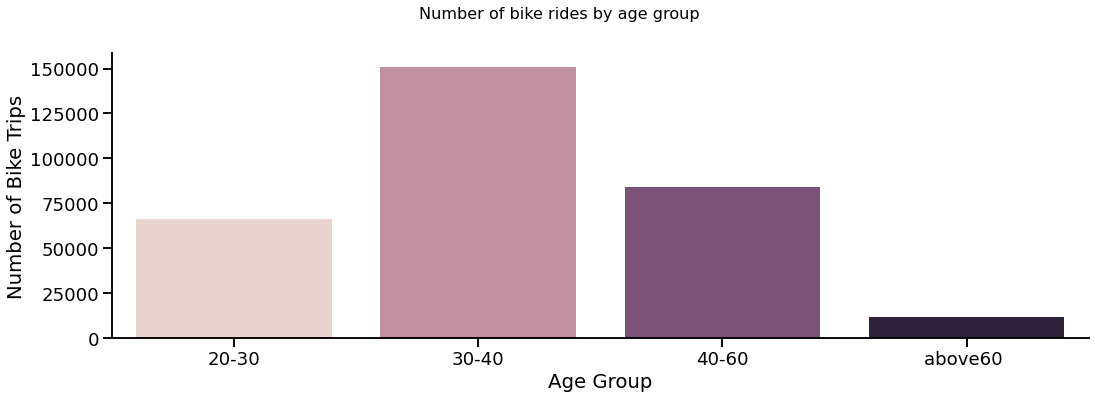

In [44]:
#count plot to show number of trips per each age group.
bin_labels= ['20-30', '30-40', '40-60', 'above60 ']
bins = [20,30,40,60,120]
df["age_group"] = pd.cut(df['member_age'], bins,labels=bin_labels)
chart = sns.catplot(data = df, x = 'age_group', kind = 'count', palette = sns.cubehelix_palette(4), height = 5,aspect =3);
chart.set_axis_labels('Age Group', 'Number of Bike Trips')
chart.fig.suptitle("Number of bike rides by age group",fontsize=16,y=1.1);

# Number of Bike Trips per day for differnt users

 - count plot to show number of trips per day for differnt users.

Observations:
- Most of the rides are on weekdays. Thats means the users are more on weekdays compared to weekends.
- Most of the riders are Subscribers.

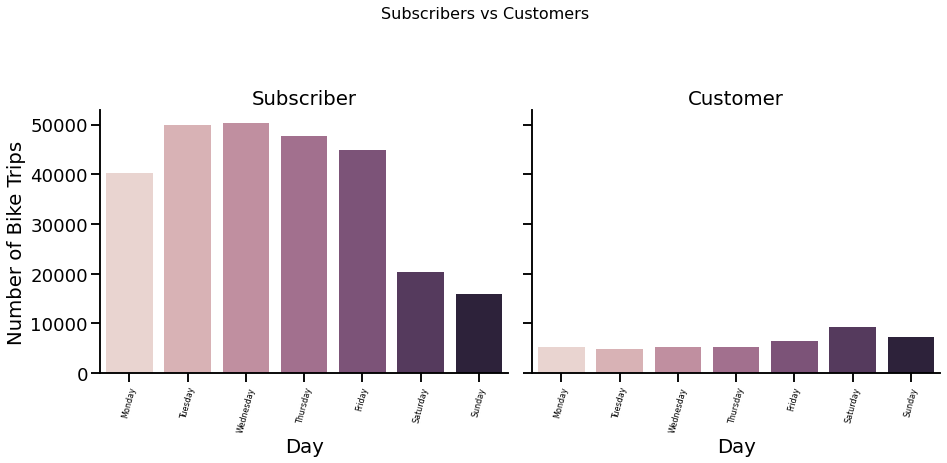

In [45]:
#catplot for comparision between Users based on no.of trips taken per day
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
chart = sns.catplot(data=df, x='start_day', kind='count', col="user_type",order=days,palette = sns.cubehelix_palette(7), height = 5,aspect =1.3);
chart.set_axis_labels("Day", "Number of Bike Trips");
chart.set_titles("{col_name}",  fontsize=8);
chart.fig.suptitle('Subscribers vs Customers ',  fontsize=16,y=1.2);
chart.set_xticklabels(rotation=75,fontsize=8);

# Conclusion:
Based on my analysis the company should provide some offers for below catergories to increase their business.
- provide offers for females to increase female customers.  
- provide offers for long Trips to increase duration of trips.
- provide offers on weekends to increase number of trips on weekends.
- provide offers for Age group above 40
- provide offers offers for customers to become subscribers